In [9]:
from netCDF4 import Dataset
import os
import numpy as np
import matplotlib.pyplot as plt
import decomp_alllevels as deco
from imp import reload
import write_netCDF as write
import amoc_plots as aplot
import tools
import xz_tools as xz_tools
import numpy.ma as ma
from scipy.interpolate import interp1d

In [30]:
case="11N"

if case=="10S":
    path = "/work/mh0256/m300522/data_storm/eddies/60-90/xz_10S-18S/aa"
    os.chdir(path)

if case=="11N":
    path = "/work/mh0256/m300522/data_storm/eddies/60-90/xz_11N-18N/aa"
    os.chdir(path)

if case=="28S-40S":
    path = "/work/mh0256/m300522/data_storm/eddies/60-90/xz_28S-40S/aa"
    os.chdir(path)

if case=="1S-18N":
    path = "/work/mh0256/m300522/data_storm/eddies/60-90/xz_1S-18N/aa"
    os.chdir(path)
    
if case=="5S":
    path = "/work/mh0256/m300522/data_storm/eddies/60-90/xz_5S-10S/aa"
    os.chdir(path)
    
if case=="1S":
    path = "/work/mh0256/m300522/data_storm/eddies/60-90/xz_1S-8N/aa"
    os.chdir(path)

if case=="1S-10S":
    path = "/work/mh0256/m300522/data_storm/eddies/60-90/xz_1S-10S/aa"
    os.chdir(path)

if case=="26N-29N":
    path = "/work/mh0256/m300522/data_storm/eddies/60-90/xz_26N-29N/aa"
    os.chdir(path)

if case == "11N":
    lx=200 # for average 11N - 18N
    rx=350 # for average
    llon=212 # for plot
    rlon=237 # for plot
if case == "10S":
    lx=380 # for average 10S - 18S
    rx=600 # for average
    llon=473 # for plot
    rlon=498 # for plot

if case == "28S-40S":
    lx= 20 # for average 10S - 18S
    rx= 180 # for average
    llon=95 # for plot
    rlon=120 # for plot

if case == "1S-18N":
    lx= 10 # for average 10S - 18S
    rx= 250 # for average
    llon=40 # for plot
    rlon=90 # for plot

if case == "5S":
    lx= 10 # for average 10S - 18S
    rx= 90 # for average
    llon=22 # for plot
    rlon=42 # for plot

if case == "1S":
    lx= 10 # for average 10S - 18S
    rx= 190 # for average
    llon=40 # for plot
    rlon=70 # for plot
    
if case == "1S-10S":
    lx= 70 # for average 1S-10S
    rx= 250 # for average
    llon=110 # for plot
    rlon=135 # for plot

if case == "26N-29N":
    lx= 10 # for average 1S-10S
    rx= 130 # for average
    llon=67 # for plot
    rlon=84 # for plot
    
llon2 = llon-lx
rlon2 = llon-lx + (rlon -llon)

In [31]:
rho = tools.netread_data('../rhopoto_stripe.nc','rhopoto') # density
lat,lon,depth = tools.netread_grid('../rhopoto_stripe.nc','lat','lon','depth_2')
divUrho = tools.netread_data("../div_U+rho+_stripe.nc","div_Urho_eddy") # eddy flux divergence
#dx_rho = tools.netread_data('dx_rhopoto_box.nc','dx_rhopoto') # zonal density gradient
vke = tools.netread_data('../vke_p_stripe.nc','vke') # vke
uko = tools.netread_data('../uko_p_stripe.nc','uko')
# Get coastlines!

filename='/work/mh0256/m300522/meta_storm/clines_30N35S.nc'
fh_clines= Dataset(filename,mode='r')

coastlines_ = fh_clines.variables["coastlines"]
clines = coastlines_[:,:].copy()
clines = clines - 250 
# Correct for the fact the clines was computed from a different box. Like this, clines refers to the current setting!

# compute the tangent and normal component at each latitude and all depth levels from 20 to 70
#tangent,normal = decomp_all.get_normals(clines,lat,lon)

# Choose the depth levels that you are interested in
ztop 	= 1000.
zbot	= 3200.

tmp1 = min(depth[:], key=lambda x:abs(x-ztop))
tmp = np.where(np.around(depth[:],decimals=1)==tmp1)[0]
ktop = tmp[0]

tmp1 = min(depth[:], key=lambda x:abs(x-zbot))
tmp = np.where(np.around(depth[:],decimals=1)==tmp1)[0]
kbot = tmp[0]

# Take the zonal boundaries from clines
if ktop >= 20:
	ktop_ = ktop -20
else:
	ktop_ = 0
	

# Now choose a latitude at which you want to have a x-z-slice
latitude = 12.

tmp = np.where(np.around(lat[:,400],decimals=1)==latitude)[0]
ilat = tmp[0] # ilat is the latitude index that I want to look for

# Now construct the cartesian grid
x,z = np.meshgrid(lon[ilat,llon2:rlon2],depth[ktop:kbot])

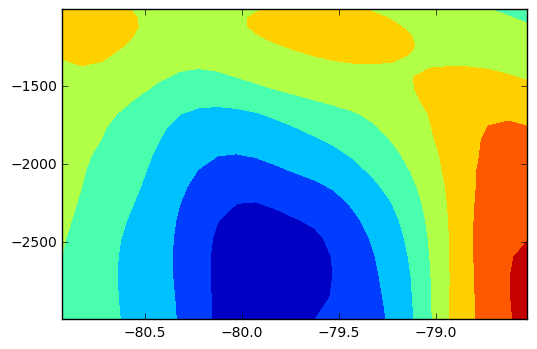

In [32]:
# Extract data U want to plot
#data_vrho 	= vrho[ktop3:kbot3,ilat3,iw:ie].copy()
data_rho 	= rho[ktop:kbot,ilat,llon2:rlon2].copy()
data_vke 	= vke[ktop:kbot,ilat,llon2:rlon2].copy()
data_uko 	= uko[ktop:kbot,ilat,llon2:rlon2].copy()
data_divUrho= divUrho[ktop:kbot,ilat,llon2:rlon2].copy()

plt.contourf(x,-z,data_uko)
plt.show()

In [19]:
uko.shape

(80, 71, 651)